In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from scipy.stats import ttest_ind
from numpy import sqrt
sns.set(font_scale=1.5)
%matplotlib inline
plt.style.use('ggplot')

In [3]:
mental_df = pd.read_csv('mental_health.csv')
mental_df.head()

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
Timestamp                                                                                                               1260 non-null object
Age                                                                                                                     1260 non-null int64
Gender                                                                                                                  1260 non-null object
Country                                                                                                                 1260 non-null object
If you live in the United States, which state or territory do you live in?                                              744 non-null object
Are you self-employed?                                                                                                  1242 non-null object
Do you have a family history of mental illness?  

In [5]:
mental_df = mental_df.rename(columns={'Have you sought treatment for a mental health condition?': 'treatment', 'How many employees does your company or organization have?': 'size', 'Do you have a family history of mental illness?': 'history'})

In [6]:
mental_df['Gender'] = mental_df['Gender'].replace('Male','M')
mental_df['Gender'] = mental_df['Gender'].replace('male','M')
mental_df['Gender'] = mental_df['Gender'].replace('m','M')
mental_df['Gender'] = mental_df['Gender'].replace('female','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female','F')
mental_df['Gender'] = mental_df['Gender'].replace('f','F')
mental_df['Gender'] = mental_df['Gender'].replace('ostensibly male, unsure what that really means','M')
mental_df['Gender'] = mental_df['Gender'].replace('Cis Man','M')
mental_df['Gender'] = mental_df['Gender'].replace('Male-ish','M')
mental_df['Gender'] = mental_df['Gender'].replace('maile','M')
mental_df['Gender'] = mental_df['Gender'].replace('something kinda male','M')
mental_df['Gender'] = mental_df['Gender'].replace('Cis Male','M')
mental_df['Gender'] = mental_df['Gender'].replace('Mal','M')
mental_df['Gender'] = mental_df['Gender'].replace('Male (CIS)','M')
mental_df['Gender'] = mental_df['Gender'].replace('something kinda male?','M')
mental_df['Gender'] = mental_df['Gender'].replace('Make','M')
mental_df['Gender'] = mental_df['Gender'].replace('Guy (-ish) ^_^','M')
mental_df['Gender'] = mental_df['Gender'].replace('Male ','M')
mental_df['Gender'] = mental_df['Gender'].replace('Man','M')
mental_df['Gender'] = mental_df['Gender'].replace('msle','M')
mental_df['Gender'] = mental_df['Gender'].replace('Mail','M')
mental_df['Gender'] = mental_df['Gender'].replace('cis male','M')
mental_df['Gender'] = mental_df['Gender'].replace('Malr','M')
mental_df['Gender'] = mental_df['Gender'].replace('Cis Female','F')
mental_df['Gender'] = mental_df['Gender'].replace('Woman','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female (cis)','F')
mental_df['Gender'] = mental_df['Gender'].replace('femail','F')
mental_df['Gender'] = mental_df['Gender'].replace('Female','F')
mental_df['Gender'] = mental_df['Gender'].replace('Femake','F')
mental_df['Gender'] = mental_df['Gender'].replace('woman','F')
mental_df['Gender'] = mental_df['Gender'].replace('cis-female/femme','F')


In [7]:
mask_M = mental_df["Gender"] == "M"
mask_F = mental_df["Gender"] == "F"
mask_mf = mask_M | mask_F
mental_gender = mental_df[mask_mf]

In [8]:
mental_gender = mental_gender[["Gender", "treatment"]]
mental_gender.head()

,Gender,treatment
0,F,Yes
1,M,No
2,M,No
3,M,Yes
4,M,No


In [9]:
mental_size = mental_df[['size','treatment']]
mental_size.head()

,size,treatment
0,6-25,Yes
1,More than 1000,No
2,6-25,No
3,26-100,Yes
4,100-500,No


In [10]:
mental_history = mental_df[['history','treatment']]
mental_history.head()

,history,treatment
0,No,Yes
1,No,No
2,No,No
3,Yes,Yes
4,No,No


In [11]:
mental_size['Mental_illness_yes'] = pd.Series(np.where(mental_size["treatment"] == "Yes",1,0), mental_size.index)
size_avg = mental_size.groupby('size').mean()
size_avg

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Mental_illness_yes
size,
1-5,0.561728
100-500,0.539773
26-100,0.519031
500-1000,0.442623
6-25,0.441379
More than 1000,0.517730


In [12]:
order = [1,4,3,5,2,6]
size_avg['order']=order
size_avg = size_avg.sort_values(['order'])
size_avg

,Mental_illness_yes,order
size,,
1-5,0.561728,1
6-25,0.441379,2
26-100,0.519031,3
100-500,0.539773,4
500-1000,0.442623,5
More than 1000,0.517730,6


In [17]:
sns.set(font_scale=2.0)

Text(0.5,1,'Occurance of Mental Illness by Company Size')

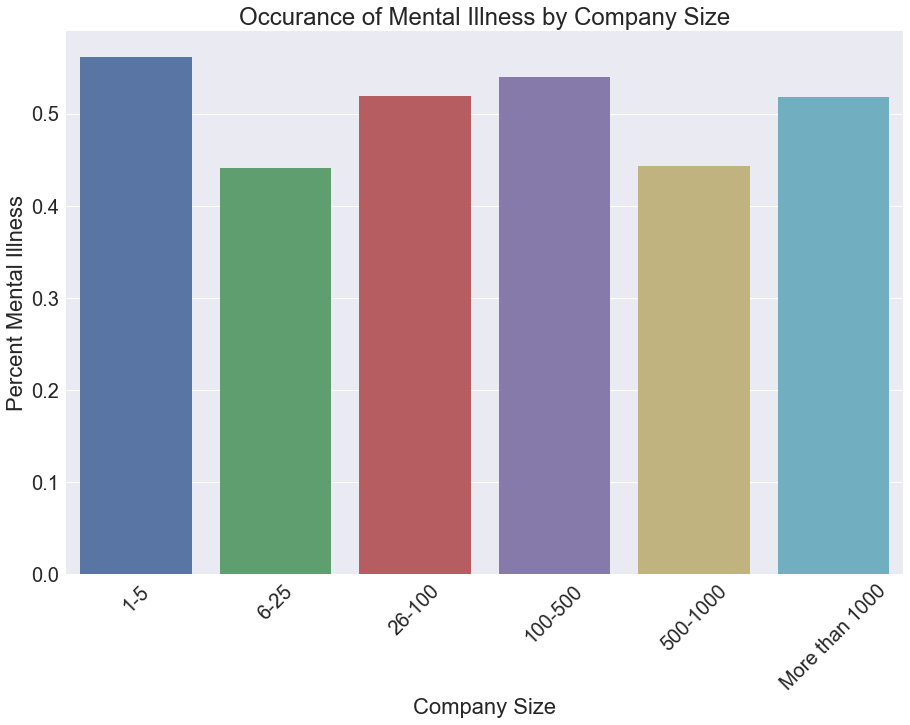

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x=size_avg.index.values, y=size_avg['Mental_illness_yes'])
plt.xticks(rotation= 45)
plt.xlabel('Company Size')
plt.ylabel('Percent Mental Illness')
plt.title('Occurance of Mental Illness by Company Size')

In [19]:
mental_history['Mental_illness_yes'] = pd.Series(np.where(mental_history["treatment"] == "Yes",1,0), mental_history.index)
history_avg = mental_history.groupby('history').mean()
history_avg

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Mental_illness_yes
history,
No,0.354167
Yes,0.741870


Text(0.5,1,'Occurance of Mental Illness Based on Family History of Mental Illness')

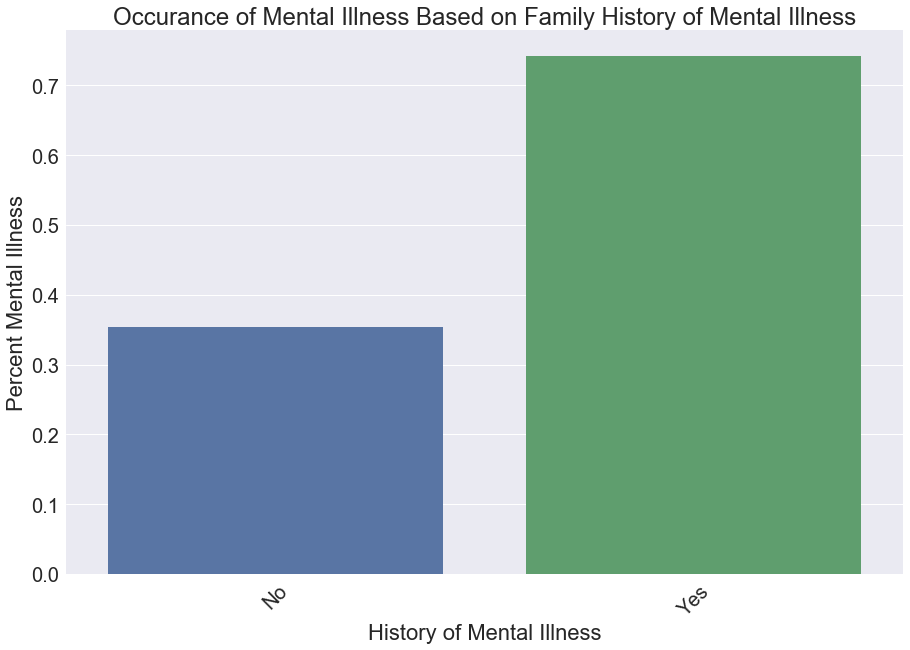

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x=history_avg.index.values, y=history_avg['Mental_illness_yes'])
plt.xticks(rotation= 45)
plt.xlabel('History of Mental Illness')
plt.ylabel('Percent Mental Illness')
plt.title('Occurance of Mental Illness Based on Family History of Mental Illness')

In [21]:
history_avg_t = mental_history.mean()
history_avg_t = history_avg_t.values.tolist()
history_avg_t = history_avg_t[0]
history_avg_t

0.5055555555555555

In [22]:
no_avg = history_avg.values.tolist()
no_avg = no_avg[0][0]
no_avg

0.3541666666666667

In [23]:
yes_avg = history_avg.values.tolist()
yes_avg = yes_avg[1][0]
yes_avg

0.741869918699187

In [24]:
no_sum = mental_history[mental_history['history']=='No'].count()
no_sum = no_sum['history']
no_sum

768

In [25]:
yes_sum = mental_history[mental_history['history']=='Yes'].count()
yes_sum = yes_sum['history']
yes_sum

492

In [27]:
se_his = sqrt(history_avg_t * (1 - history_avg_t) * (1 / no_sum + 1 / yes_sum))
z_his =(yes_avg-no_avg)/se_his
z_his

13.428705151898392

In [28]:
p_val_his = 1 - stats.norm.cdf(z_his)
p_val_his

0.0

In [29]:
mental_gender['Mental_illness_yes'] = pd.Series(np.where(mental_gender["treatment"] == "Yes",1,0), mental_gender.index)
gender_avg = mental_gender.groupby('Gender').mean()
gender_avg

,Mental_illness_yes
Gender,
F,0.689796
M,0.454271


Text(0.5,1,'Occurance of Mental Illness by Sex')

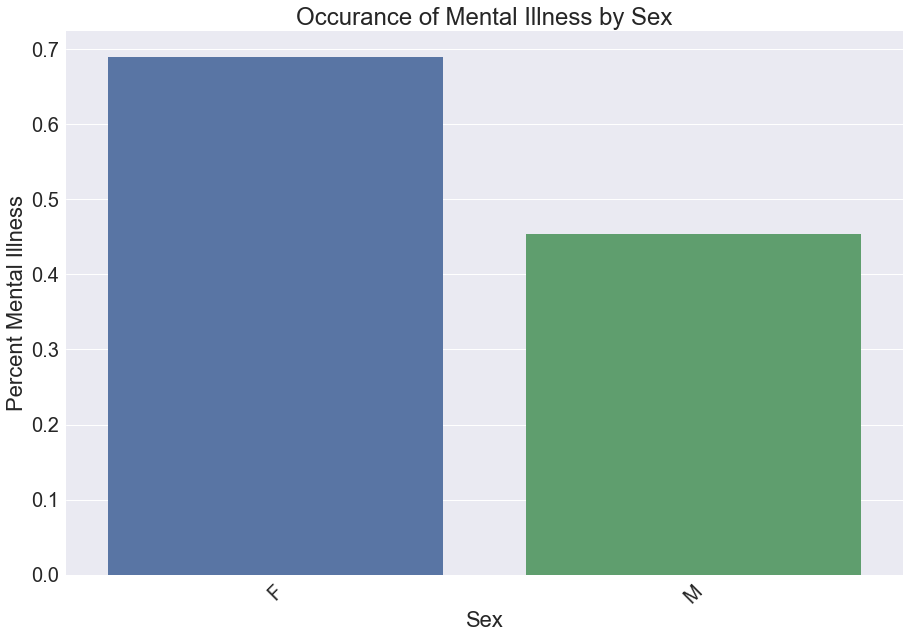

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x=gender_avg.index.values, y=gender_avg['Mental_illness_yes'])
plt.xticks(rotation= 45)
plt.xlabel('Sex')
plt.ylabel('Percent Mental Illness')
plt.title('Occurance of Mental Illness by Sex')

In [31]:
gender_avg_t = mental_gender.mean()
gender_avg_t = gender_avg_t.values.tolist()
gender_avg_t = gender_avg_t[0]
gender_avg_t

0.5008064516129033

In [32]:
fem_avg = gender_avg.values.tolist()
fem_avg = fem_avg[0][0]
fem_avg

0.689795918367347

In [33]:
male_avg = gender_avg.values.tolist()
male_avg = male_avg[1][0]
male_avg

0.4542713567839196

In [34]:
fem_sum = mental_gender[mental_gender['Gender']=='F'].count()
fem_sum = fem_sum['Gender']
fem_sum

245

In [35]:
male_sum = mental_gender[mental_gender['Gender']=='M'].count()
male_sum = male_sum['Gender']
male_sum

995

In [36]:
se_gen = sqrt(gender_avg_t * (1 - gender_avg_t) * (1 / fem_sum + 1 / male_sum))
z_gen =(fem_avg-male_avg)/se_gen
z_gen

6.604660593456575

In [37]:
p_val_gen = 1 - stats.norm.cdf(z_gen)
p_val_gen

1.992150888696642e-11